# People counter with baseline CNN
- We train a Convolutional neural network with a soft-max output layer comprising 5 output nodes.

## 0. Import Packages

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import tarfile
import pandas as pd

from six.moves import urllib
from glob import glob
import random
import shutil
from PIL import Image 
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import load_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.framework import ops

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


# 1. Make Dataset

In [6]:
dir = "X_data/"
listdir = os.listdir(dir)

print(listdir[:5])
print("The number of dataset :", len(listdir))

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg']
The number of dataset : 647


In [7]:
x_orig = []

for i in range(1,len(listdir) + 1):

    img = Image.open('X_data/' + str(i) + '.jpg') 
    img_resize = img.resize((128, 72))
    data = np.array(img_resize)
    x_orig.append(data)
    
x_orig = np.array(x_orig)    

In [8]:
y_orig = []
label = pd.read_csv('y_label.txt', encoding = 'cp949', header = None)
y_orig = np.array(label)

In [9]:
print("Shape of x_orig :", x_orig.shape)
print("Shape of y_orig :", y_orig.shape)

Shape of x_orig : (647, 72, 128, 3)
Shape of y_orig : (647, 1)


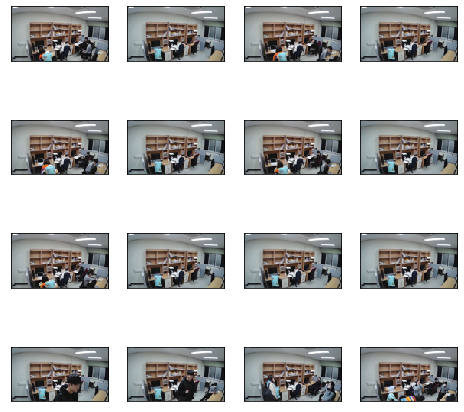

In [10]:
# plot image grid
fig = plt.figure(figsize=(8, 8))
for x in range(4):
    for y in range(4):
        ax = fig.add_subplot(4, 4, 4*y+x+1)
        plt.imshow(x_orig[4*y+x])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
plt.show()

In [11]:
# Random shuffle
s = np.arange(x_orig.shape[0])
np.random.shuffle(s)

x_shuffle = x_orig[s,:]
y_shuffle = y_orig[s,:]

print(x_shuffle.shape)
print(y_shuffle.shape)

(647, 72, 128, 3)
(647, 1)


In [12]:
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(x_shuffle, y_shuffle, 
                                                                        test_size=0.2,  shuffle = True, random_state=1004)

In [13]:
# Normalize image vectors
x_train = x_train_orig/255.
x_test = x_test_orig/255.

# Convert train and test labels to one hot matrices
enc = OneHotEncoder()
y1 = y_train_orig.reshape(-1,1)
enc.fit(y1)
y_train = enc.transform(y1).toarray()

y2 = y_test_orig.reshape(-1,1)
enc.fit(y2)
y_test = enc.transform(y2).toarray()

# Explore your dataset 
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 517
number of test examples = 130
x_train shape: (517, 72, 128, 3)
y_train shape: (517, 11)
x_test shape: (130, 72, 128, 3)
y_test shape: (130, 11)


## 2. Baseline CNN

In [14]:
# params
batch_size = 1
num_classes = 11
epochs = 100

In [18]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same',
                 activation='relu',
                 input_shape=(72, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 36, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 16, 32)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 16, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)              

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [20]:
%%time
hist100 = model.fit(x_train, y_train,
                 batch_size = 517//batch_size,
                 epochs = epochs,
                 verbose = 1, 
                 validation_data = (x_test, y_test))

Train on 517 samples, validate on 130 samples
Epoch 1/100
517/517 [==============================] - 2s 5ms/step - loss: 2.4065 - accuracy: 0.0851 - val_loss: 2.3928 - val_accuracy: 0.0538
Epoch 2/100
517/517 [==============================] - 2s 5ms/step - loss: 2.3926 - accuracy: 0.0967 - val_loss: 2.3835 - val_accuracy: 0.0692
Epoch 3/100
517/517 [==============================] - 2s 4ms/step - loss: 2.3875 - accuracy: 0.0832 - val_loss: 2.3740 - val_accuracy: 0.1308
Epoch 4/100
517/517 [==============================] - 2s 4ms/step - loss: 2.3725 - accuracy: 0.1083 - val_loss: 2.3651 - val_accuracy: 0.1462
Epoch 5/100
517/517 [==============================] - 2s 5ms/step - loss: 2.3651 - accuracy: 0.1064 - val_loss: 2.3576 - val_accuracy: 0.1231
Epoch 6/100
517/517 [==============================] - 2s 5ms/step - loss: 2.3462 - accuracy: 0.1296 - val_loss: 2.3507 - val_accuracy: 0.1231
Epoch 7/100
517/517 [==============================] - 2s 5ms/step - loss: 2.3377 - accuracy: 0.

Epoch 58/100
517/517 [==============================] - 3s 5ms/step - loss: 2.1212 - accuracy: 0.2553 - val_loss: 2.2493 - val_accuracy: 0.1692
Epoch 59/100
517/517 [==============================] - 2s 5ms/step - loss: 2.1357 - accuracy: 0.2263 - val_loss: 2.2471 - val_accuracy: 0.1692
Epoch 60/100
517/517 [==============================] - 2s 5ms/step - loss: 2.1612 - accuracy: 0.2147 - val_loss: 2.2460 - val_accuracy: 0.1692
Epoch 61/100
517/517 [==============================] - 2s 5ms/step - loss: 2.1517 - accuracy: 0.2166 - val_loss: 2.2446 - val_accuracy: 0.1846
Epoch 62/100
517/517 [==============================] - 2s 5ms/step - loss: 2.1511 - accuracy: 0.2321 - val_loss: 2.2425 - val_accuracy: 0.1923
Epoch 63/100
517/517 [==============================] - 3s 5ms/step - loss: 2.1552 - accuracy: 0.2186 - val_loss: 2.2394 - val_accuracy: 0.2000
Epoch 64/100
517/517 [==============================] - 3s 5ms/step - loss: 2.1253 - accuracy: 0.2282 - val_loss: 2.2390 - val_accuracy:

## 3. Results

In [21]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 10))

    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Baseline CNN Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Baseline CNN loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()

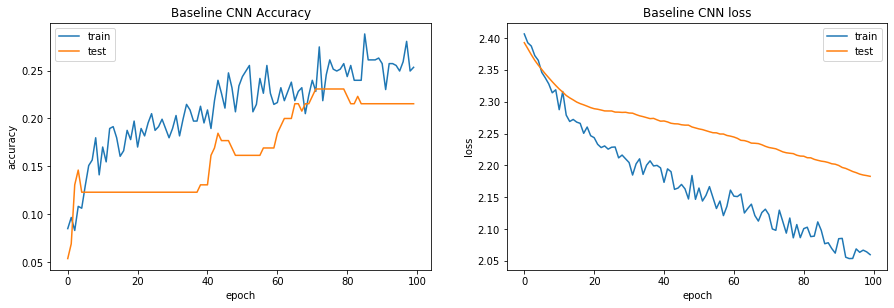

In [22]:
plot_accuracy_and_loss(hist100)

In [23]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train accuracy:', train_score[1])
print('Test accuracy:', test_score[1])

Train accuracy: 0.27272728085517883
Test accuracy: 0.2153846174478531


In [25]:
train_result_orig = model.predict(x_train)
test_result_orig = model.predict(x_test)
print(train_result_orig[:5])

[[0.02824814 0.02942493 0.0643013  0.10768864 0.1178176  0.05990875
  0.13698207 0.12674585 0.14453384 0.17315148 0.01119738]
 [0.03058301 0.03675839 0.06673027 0.11089931 0.12401976 0.06606794
  0.13839403 0.10755192 0.12376079 0.18203634 0.01319825]
 [0.0275156  0.03032542 0.06893941 0.11881001 0.12596416 0.05435263
  0.14196132 0.12047084 0.13894199 0.16204837 0.01067028]
 [0.04000297 0.03568994 0.0554699  0.12869497 0.10594303 0.06832149
  0.13066997 0.11859009 0.13659455 0.17088394 0.00913918]
 [0.0397757  0.03475288 0.05664837 0.12499339 0.10830176 0.06877452
  0.13168442 0.11575647 0.13367572 0.17673704 0.00889977]]


In [26]:
train_result = np.argmax(train_result_orig, axis = 1)
test_result = np.argmax(test_result_orig, axis = 1)
print(train_result)
print(test_result)

[9 9 9 9 9 9 9 9 9 9 9 3 9 9 9 3 3 9 9 3 9 3 9 9 9 9 9 9 9 9 9 3 9 3 3 3 9
 9 9 3 9 9 3 9 9 3 9 9 9 9 9 9 9 9 9 3 3 9 9 9 9 9 9 9 9 9 9 9 3 9 9 3 3 3
 3 9 9 3 9 3 9 9 9 9 3 9 3 9 9 9 9 3 3 9 9 9 9 9 9 9 3 3 9 9 9 9 9 9 9 9 9
 3 9 9 9 9 9 9 9 9 3 9 9 3 9 9 3 3 3 9 3 9 9 9 3 3 9 9 9 3 9 3 9 9 9 9 9 9
 9 9 9 3 3 9 3 9 9 9 9 9 9 9 9 9 9 9 9 9 3 3 9 9 3 9 9 3 3 3 9 3 3 9 9 9 9
 9 9 9 3 9 9 3 9 9 3 3 9 9 9 9 9 3 9 3 9 9 9 9 3 9 9 3 9 9 9 9 9 3 9 3 9 9
 3 3 9 3 9 9 9 9 9 9 9 3 9 9 9 9 9 3 9 3 9 9 9 9 3 9 9 3 9 9 9 9 9 3 3 9 9
 3 9 3 9 9 9 3 9 9 3 9 9 9 3 9 9 9 3 9 9 3 9 9 3 9 9 9 9 9 9 3 3 9 3 9 3 9
 9 9 3 3 9 9 9 9 9 9 9 3 9 3 9 9 9 3 9 3 3 9 9 9 9 3 9 3 9 9 9 3 9 9 9 9 3
 9 9 9 9 9 3 9 9 9 3 9 9 9 3 3 9 9 9 9 9 9 9 9 9 9 9 9 9 9 3 9 9 9 9 3 9 9
 3 9 9 9 9 9 9 9 9 9 9 9 9 3 3 9 9 9 9 9 9 3 9 3 9 9 9 9 3 9 3 9 3 3 9 9 9
 9 9 9 9 9 9 9 9 3 9 3 3 9 3 9 3 9 9 9 9 9 9 9 9 3 3 3 3 3 3 9 3 9 9 3 9 9
 9 3 3 3 9 3 9 9 9 9 3 3 9 9 3 9 9 9 3 9 3 9 9 9 3 9 9 9 3 3 9 9 9 9 9 9 3
 9 3 9 3 9 3 9 9 9 3 9 3 

## 4. Save and Load model

In [31]:
# save model architecture
model_json = model.to_json()
open('model_100iter.json', 'w').write(model_json)

# save model's learned weights
model.save_weights('weights_100iter.h5', overwrite=True)

In [33]:
# Load trained model
from keras.models import model_from_json 

json_file = open("model_100iter.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("weights_100iter.h5")
print("Loaded model from disk")

Loaded model from disk
